In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 2)

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire
from acquire import get_titanic_data, get_iris_data

import os
import env

import explore

### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris = sns.load_dataset('iris')

In [ ]:
type(df_iris)

#### print the first 3 rows

In [ ]:
df_iris.head(3)

#### print the number of rows and columns

In [ ]:
df_iris.shape

#### print the column names

In [ ]:
df_iris.columns

#### print the data type of each column

In [ ]:
df_iris.info()

#### print the summary statistics for each of the numeric variables

In [ ]:
# .T to transpose
df_iris.describe().T

### Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
# redo this with Spreadsheets_Exercises.xlsx
telco = pd.read_excel("Spreadsheets_Exercises.xlsx")
telco.head().T

In [ ]:
# Setup Yes/No as booleans
telco.partner = telco.partner == "Yes"
telco.dependents = telco.dependents == "Yes"
telco.churn = telco.churn == "Yes"
telco.is_senior_citizen = telco.is_senior_citizen == 1

In [ ]:
# map phone_service, internet_service, and contract_type
contract_type = {
    0: "Month-to-Month",
    1: "1 Year",
    2: "2 Year"
}

phone_service = {
    0: "No Phone Service",
    1: "One line",
    2: "Two or more lines"
}

internet_service = {
    0: "No Internet Service",
    1: "DSL",
    2: "Fiber Optic"
}

telco.contract_type = telco.contract_type.map(contract_type)
telco.phone_service = telco.phone_service.map(phone_service)
telco.internet_service = telco.internet_service.map(internet_service)

In [ ]:
telco.head().T

In [ ]:
df_excel = pd.read_csv('Cust_Churn_Telco.csv')

#### assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.loc[0:100, :].copy()
df_excel_sample

#### print the number of rows of your original dataframe

In [ ]:
len(df_excel)

#### print the first 5 column names


In [ ]:
df_excel.columns[:5]

#### print the column names that have a data type of object

In [ ]:
df_excel.select_dtypes(include=['object']).columns

#### compute the range for each of the numeric variables.

In [ ]:
numerics = df_excel.select_dtypes(include=['float64','int64'])
numerics.max()-numerics.min()

In [ ]:
print('Tenure range = ',(df_excel.tenure.max() - df_excel.tenure.min()))
print('Monthly Charges range = ',(df_excel.MonthlyCharges.max() - df_excel.MonthlyCharges.min()))
print('Total Charges range = ',(df_excel.TotalCharges.max() - df_excel.TotalCharges.min()))

### Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

#### print the first 3 rows

In [ ]:
df_google.head(3)

#### print the number of rows and columns

In [ ]:
df_google.shape

#### print the column names

In [ ]:
df_google.columns.tolist()

#### print the data type of each column

In [ ]:
df_google.dtypes

#### print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe().T

#### print the unique values for each of your categorical variables


In [ ]:
for column in df_google.select_dtypes(include = 'object').columns:
    print(f"Value in the {column} column:")
    print(df_google[column].value_counts())
    print("-------")
    print()

In [ ]:
print(df_google.Survived.value_counts())
print(df_google.Pclass.value_counts())
print(df_google.Sex.value_counts())
print(df_google.SibSp.value_counts())
print(df_google.Parch.value_counts())
print(df_google.Cabin.value_counts())
print(df_google.Embarked.value_counts())

### Data Prep Exercises

#### Use the function defined in acquire.py to load the iris data.

In [2]:
df = acquire.get_iris_data()
df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


#### Drop the species_id and measurement_id columns.

In [3]:
df.columns

Index(['species_id', 'species_name', 'measurement_id', 'sepal_length',
       'sepal_width', 'petal_length', 'petal_width'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['species_id','measurement_id'])
df.head()

#### Rename the species_name column to just species.

In [4]:
df = df.rename(columns = {"species_name": "species"})
df.head()

,species_id,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


#### Create dummy variables of the species name.

In [5]:
df.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [14]:
df_dummy = pd.get_dummies(df[['species']], drop_first = False)
df_dummy.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [15]:
df = pd.concat([df,df_dummy], axis=1)
df.head()

,species_id,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,1,setosa,1,5.1,3.5,1.4,0.2,1,0,0
1,1,setosa,2,4.9,3.0,1.4,0.2,1,0,0
2,1,setosa,3,4.7,3.2,1.3,0.2,1,0,0
3,1,setosa,4,4.6,3.1,1.5,0.2,1,0,0
4,1,setosa,5,5.0,3.6,1.4,0.2,1,0,0


#### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
# All Together:
##def clean_data(df):
#    df.drop_duplicates(inplace = True)
#    df.drop(columns = ['species_id','measurement_id'], inplace = True)
#    df.rename(columns = {"species_name": "species"}, inplace = True)
#    dummy_df = pd.get_dummies(df[['species']], drop_first = True)
#    return pd.concat([df, dummy_df], axis=1)

### Exploratory Analysis Exercise

In [16]:
df.head()

,species_id,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,1,setosa,1,5.1,3.5,1.4,0.2,1,0,0
1,1,setosa,2,4.9,3.0,1.4,0.2,1,0,0
2,1,setosa,3,4.7,3.2,1.3,0.2,1,0,0
3,1,setosa,4,4.6,3.1,1.5,0.2,1,0,0
4,1,setosa,5,5.0,3.6,1.4,0.2,1,0,0


#### Acquire, prepare & split your data.



In [17]:
train, validate, test = explore.train_validate_test_split(df, 'species', seed=123 )

print(train.shape)
print(validate.shape)
print(test.shape)

(84, 10)
(36, 10)
(30, 10)


In [18]:
df.head(2)

,species_id,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,1,setosa,1,5.1,3.5,1.4,0.2,1,0,0
1,1,setosa,2,4.9,3.0,1.4,0.2,1,0,0


#### Univariate Stats

In [19]:
cat_vars = ['species_id','species','species_setosa','species_versicolor','species_virginica']
quant_vars = ['sepal_length','sepal_width','petal_length','petal_width']

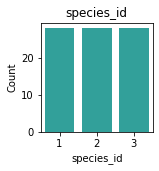

   species_id  Count  Percent
1           2     28    33.33
2           1     28    33.33
3           3     28    33.33
_________________________________________________________________


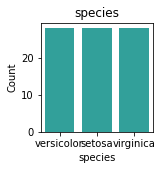

               species  Count  Percent
virginica   versicolor     28    33.33
versicolor      setosa     28    33.33
setosa       virginica     28    33.33
_________________________________________________________________


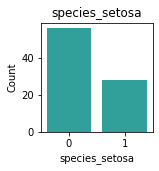

   species_setosa  Count  Percent
0               0     56    66.67
1               1     28    33.33
_________________________________________________________________


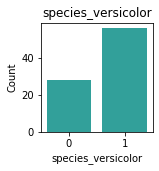

   species_versicolor  Count  Percent
0                   1     56    66.67
1                   0     28    33.33
_________________________________________________________________


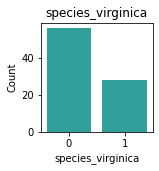

   species_virginica  Count  Percent
0                  0     56    66.67
1                  1     28    33.33
_________________________________________________________________


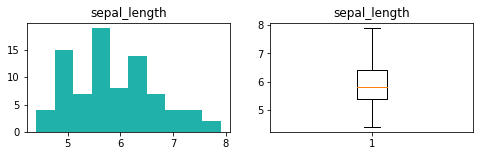

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


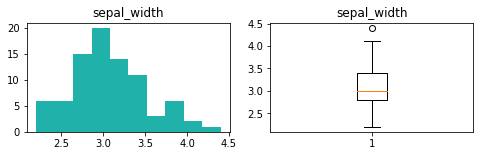

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


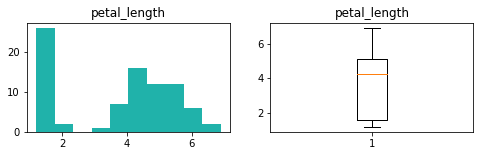

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


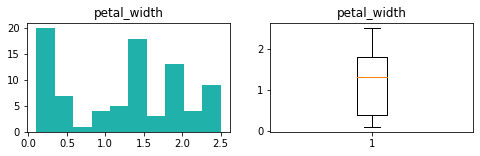

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [20]:
explore.explore_univariate(train, cat_vars, quant_vars)

#### Bivariate Stats



species_id 
_____________________

    chi2       p-value  degrees of freedom
0  168.0  2.809846e-35                   4

observed:
 species_id   1   2   3  All
species_id                 
1           28   0   0   28
2            0  28   0   28
3            0   0  28   28
All         28  28  28   84

expected:
           0         1         2
0  9.333333  9.333333  9.333333
1  9.333333  9.333333  9.333333
2  9.333333  9.333333  9.333333


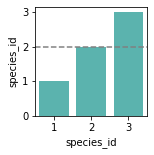


_____________________

species 
_____________________

    chi2       p-value  degrees of freedom
0  168.0  2.809846e-35                   4

observed:
 species_id   1   2   3  All
species                    
setosa      28   0   0   28
versicolor   0  28   0   28
virginica    0   0  28   28
All         28  28  28   84

expected:
           0         1         2
0  9.333333  9.333333  9.333333
1  9.333333  9.333333  9.333333
2  9.333333  9.333333  9.333333


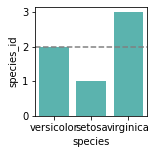


_____________________

species_setosa 
_____________________

   chi2       p-value  degrees of freedom
0  84.0  5.749522e-19                   2

observed:
 species_id       1   2   3  All
species_setosa                 
0                0  28  28   56
1               28   0   0   28
All             28  28  28   84

expected:
            0          1          2
0  18.666667  18.666667  18.666667
1   9.333333   9.333333   9.333333


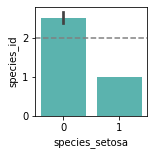


_____________________

species_versicolor 
_____________________

   chi2       p-value  degrees of freedom
0  84.0  5.749522e-19                   2

observed:
 species_id           1   2   3  All
species_versicolor                 
0                   28   0  28   56
1                    0  28   0   28
All                 28  28  28   84

expected:
            0          1          2
0  18.666667  18.666667  18.666667
1   9.333333   9.333333   9.333333


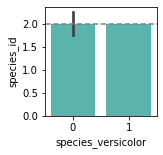


_____________________

species_virginica 
_____________________

   chi2       p-value  degrees of freedom
0  84.0  5.749522e-19                   2

observed:
 species_id          1   2   3  All
species_virginica                 
0                  28  28   0   56
1                   0   0  28   28
All                28  28  28   84

expected:
            0          1          2
0  18.666667  18.666667  18.666667
1   9.333333   9.333333   9.333333


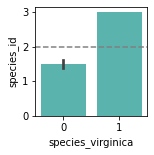


_____________________

sepal_length 
____________________



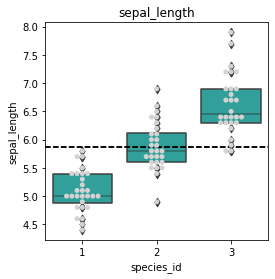

            count      mean       std  min    25%   50%    75%  max
species_id                                                         
1            28.0  5.089286  0.360390  4.4  4.875  5.00  5.400  5.8
2            28.0  5.896429  0.425556  4.9  5.600  5.80  6.125  6.9
3            28.0  6.625000  0.532378  5.8  6.300  6.45  6.900  7.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

sepal_width 
____________________



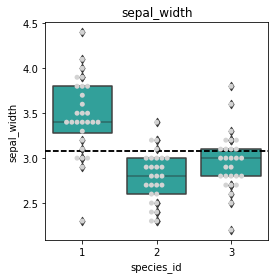

            count      mean       std  min    25%  50%  75%  max
species_id                                                      
1            28.0  3.467857  0.427788  2.3  3.275  3.4  3.8  4.4
2            28.0  2.796429  0.280848  2.3  2.600  2.8  3.0  3.4
3            28.0  2.960714  0.318956  2.2  2.800  3.0  3.1  3.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_length 
____________________



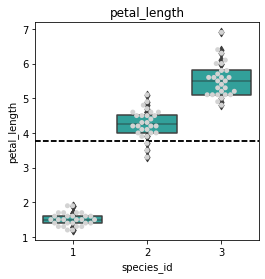

            count      mean       std  min  25%   50%    75%  max
species_id                                                       
1            28.0  1.507143  0.184448  1.2  1.4  1.50  1.600  1.9
2            28.0  4.271429  0.409930  3.3  4.0  4.25  4.525  5.1
3            28.0  5.535714  0.496815  4.8  5.1  5.50  5.800  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_width 
____________________



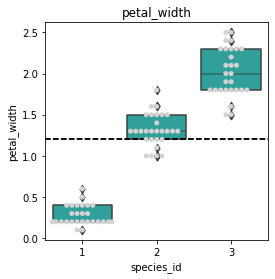

            count      mean       std  min  25%  50%  75%  max
species_id                                                    
1            28.0  0.275000  0.120570  0.1  0.2  0.2  0.4  0.6
2            28.0  1.314286  0.199470  1.0  1.2  1.3  1.5  1.8
3            28.0  2.021429  0.293582  1.5  1.8  2.0  2.3  2.5 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [21]:
explore.explore_bivariate(train, 'species_id', cat_vars, quant_vars)

#### Multivariate Stats

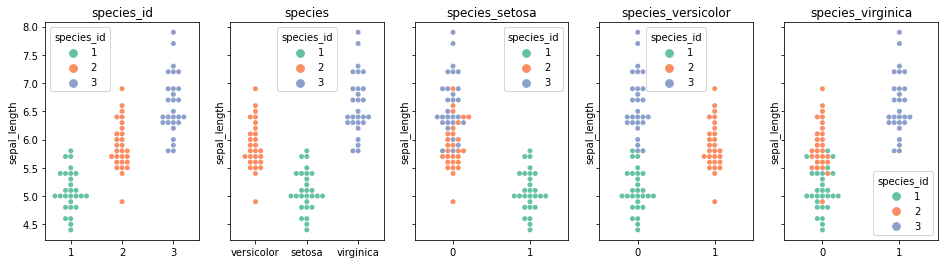

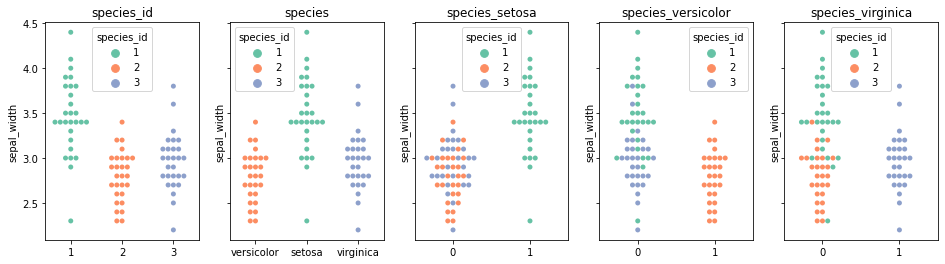

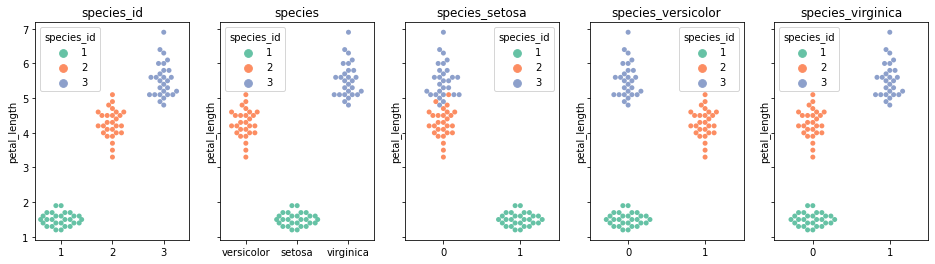

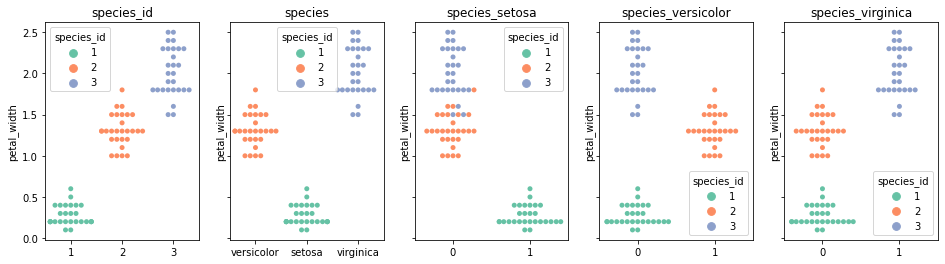

ValueError: There must be exactly two hue levels to use `split`.'

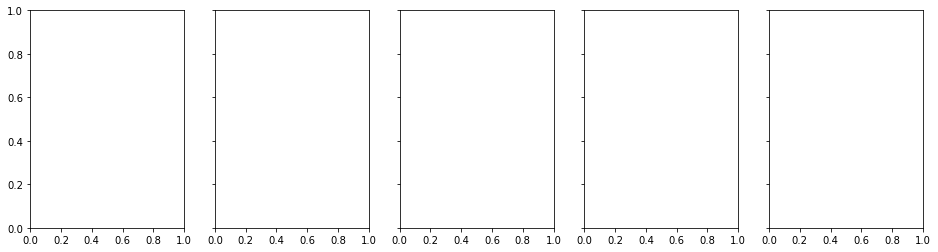

In [27]:
explore.explore_multivariate(train, 'species_id', cat_vars, quant_vars)